In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from datetime import datetime
import shap

In [2]:
exec(open("../../header.py").read())

In [5]:
folder = 'boston'

In [6]:
X = pd.read_csv(processed_root(f'{folder}/X.csv'))
y = pd.read_csv(processed_root(f'{folder}/y.csv'))

In [8]:
mlp = MLPRegressor()
mlp.fit(X, y.iloc[:,0])

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPRegressor()

In [9]:
mlp.score(X, y)

0.6679590883088142

In [31]:
shap_values = shap.KernelExplainer(mlp.predict, X).shap_values(shap.sample(X,10))

Using 506 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


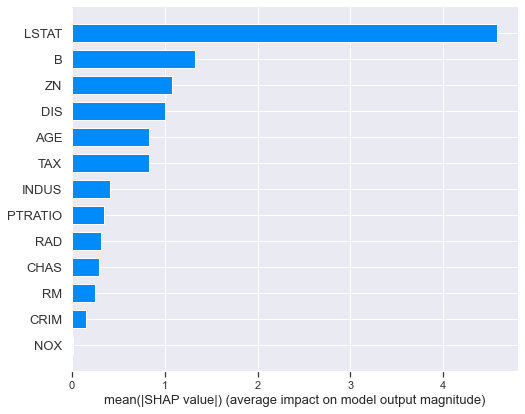

In [32]:
shap.summary_plot(shap_values, X, 
            plot_type = "bar")

In [33]:
vals = np.abs(shap_values).mean(0)

In [34]:
vals

array([0.15621943, 1.07828103, 0.41191843, 0.29635185, 0.01079187,
       0.24455055, 0.83630989, 1.00091826, 0.31014558, 0.8329008 ,
       0.34144608, 1.32636738, 4.5786421 ])

In [36]:
fi_df = pd.DataFrame(list(zip(X.columns, vals)), 
                    columns=['Feature','Shapley Value']).\
                sort_values('Shapley Value', ascending = False).\
                reset_index().\
                drop(['index'], axis=1)


In [37]:
fi_df

,Feature,Shapley Value
0,LSTAT,4.578642
1,B,1.326367
2,ZN,1.078281
3,DIS,1.000918
4,AGE,0.836310
5,TAX,0.832901
6,INDUS,0.411918
7,PTRATIO,0.341446
8,RAD,0.310146
9,CHAS,0.296352
